
# Grid Search Double Exponential Smoothing

Double Exponential Smoothing (DES) also called the Holtz Method is a method for forecasting for this project we will use univariate data for times series analysis. 

This method incorporates the usage of past observations of weighted averages to predict future values.

### Configuration Parameters

- t = Trend
- d = Dampening
- s = Seasonality
- p = Seasonal Period
- b = Box-Cox Transform
- r = Remove Bias

In [2]:
import pandas as pd
from math import sqrt
from multiprocessing import cpu_count
from joblib import Parallel
from joblib import delayed
from warnings import catch_warnings
from warnings import filterwarnings
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error
from numpy import array
import matplotlib.pyplot as plt


In [3]:
# Bring in our cpi data
cpi_u = pd.read_csv('/Users/jasonrobinson/Documents/Projects/bls_project/data_2/SeriesReport-cpi-all-u-notadj.48.csv')
cpi_w = pd.read_csv('/Users/jasonrobinson/Documents/Projects/bls_project/data_2/SeriesReport-cpi-urbwage-notadj.48.csv')

In [4]:
cpi_u.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1948,23.7,23.5,23.4,23.8,23.9,24.1,24.4,24.5,24.5,24.4,24.2,24.1
1,1949,24.0,23.8,23.8,23.9,23.8,23.9,23.7,23.8,23.9,23.7,23.8,23.6
2,1950,23.5,23.5,23.6,23.6,23.7,23.8,24.1,24.3,24.4,24.6,24.7,25.0
3,1951,25.4,25.7,25.8,25.8,25.9,25.9,25.9,25.9,26.1,26.2,26.4,26.5
4,1952,26.5,26.3,26.3,26.4,26.4,26.5,26.7,26.7,26.7,26.7,26.7,26.7



## Hyperparameters

Establishing hyperparameters when defining the model to control the nature of the exponential smoothing performed for the series. If they are not specified the model will tune automatically.  

- **smoothing_level** (alpha): the smoothing coefficient for the level.
- **smoothing_slope** (beta): the smoothing coefficient for the trend.
- **smoothing_seasonal** (gamma): the smoothing coefficient for the seasonal component.
- **damping_slope** (phi): the coefficient for the damped trend.

A great

In [ ]:
model = SimpletExpSmooth(cpi_u)
model_fit = model.fit()

In [5]:
# Convert to datetime
cpi_u['Year'] = cpi_u['Year'].apply(pd.to_datetime)
#cpi_u.reset_index('Year',inplace=True)
cpi_u.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1970-01-01 00:00:00.000001948,23.7,23.5,23.4,23.8,23.9,24.1,24.4,24.5,24.5,24.4,24.2,24.1
1,1970-01-01 00:00:00.000001949,24.0,23.8,23.8,23.9,23.8,23.9,23.7,23.8,23.9,23.7,23.8,23.6
2,1970-01-01 00:00:00.000001950,23.5,23.5,23.6,23.6,23.7,23.8,24.1,24.3,24.4,24.6,24.7,25.0
3,1970-01-01 00:00:00.000001951,25.4,25.7,25.8,25.8,25.9,25.9,25.9,25.9,26.1,26.2,26.4,26.5
4,1970-01-01 00:00:00.000001952,26.5,26.3,26.3,26.4,26.4,26.5,26.7,26.7,26.7,26.7,26.7,26.7


Text(0, 0.5, 'Jan')

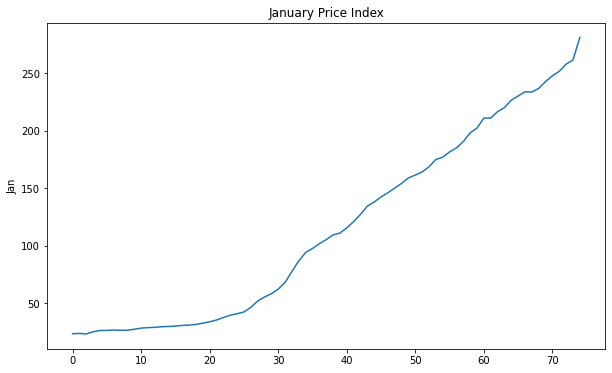

In [9]:
cpi_u['Jan'].plot(figsize=(10,6),title='January Price Index')
plt.ylabel('Jan')

Text(0.5, 0, 'Prices')

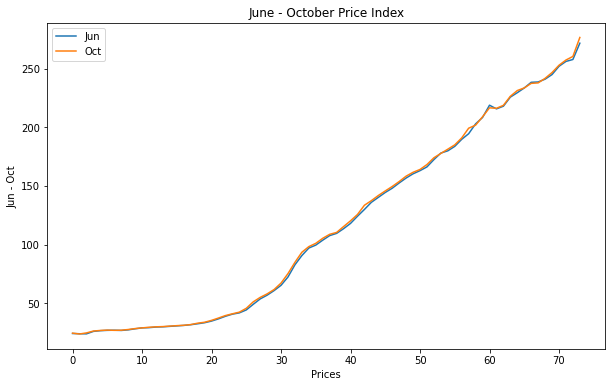

In [31]:
cpi_u[['Jun', 'Oct']].plot(figsize=(10,6),title='June - October Price Index')
plt.ylabel('Jun - Oct')
plt.xlabel('Prices')

Text(0.5, 0, 'Prices')

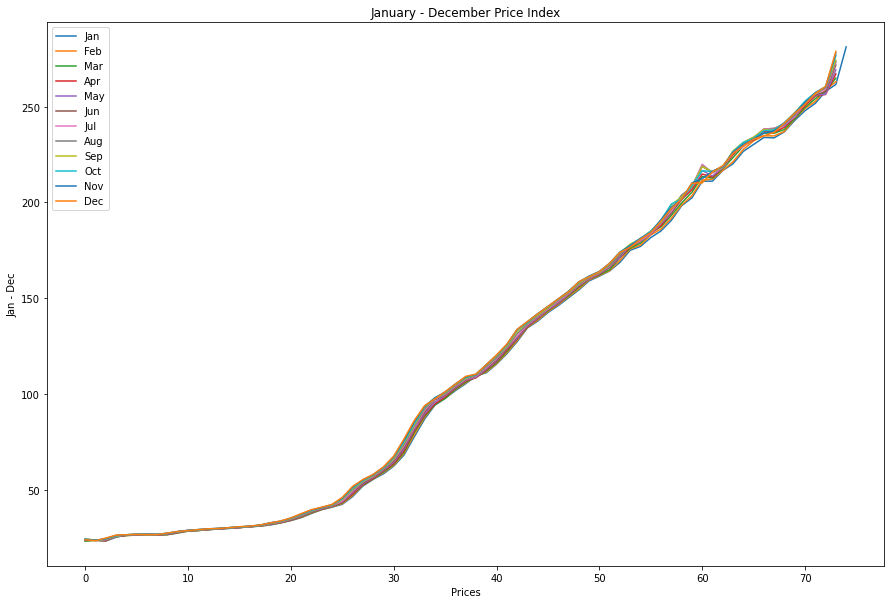

In [32]:
#   clearly see trend for the year

cpi_u[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']].plot(figsize=(15,10),title='January - December Price Index')
plt.ylabel('Jan - Dec')
plt.xlabel('Prices')

In [ ]:
# Load sunspot data
from pandas import read_csv
from matplotlib import pyplot
series = read_csv('sunspots.csv', header=0, index_col=0)
print(series.head())
series.plot()
pyplot.show()

### ACF/PACF

- **Autocorrelation Function (ACF)**. The plot summarizes the correlation of an observation with lag values. The x-axis shows the lag and the y-axis shows the correlation coefficient between -1 and 1 for negative and positive correlation.
- **Partial Autocorrelation Function (PACF)**. The plot summarizes the correlations for an observation with lag values that is not accounted for by prior lagged observations.

In [4]:
# We will begin by creating a function for Triple Exponential
# Smoothing or commonly know as Holt Winter's Exponential Smoothing
def exp_smoothing_forecast(cpi_u, config):
    t, d, s, p, b, r = config
    history = array(cpi_u)
    
    model = ExponentialSmoothing(cpi_u, trend=t, damped=d, seasonal=s, seaonal_periods=p)
    model_fit = model.fit(optimized=True, use_boxcox=b, remove_bias=r)
    
    y_hat = model_fit.predict(len(history), len(history))
    return y_hat[0]

In [5]:
# Now we will split our univariate dataset into train and test
def train_test_split(cpi_u, n_test):
    return cpi_u[:-n_test], data[-n_test:]

In [6]:
# Calculate our error score could also use other like 
# MAPE, MAE, etc.
def measure_rsme(actual, predicted):
    return sqrt(mean_squared_error(actural, predicted))

Walk-forward validation scheme

In [10]:
# Walk-forward validation for univarite data
def walk_forward_validation(data, n_test, cfg):
    predictions = list()
    train, test = train_test_split(data, n_test)
    history = [x for x in train]
    
    for i in range(len(test)):
        y_hat = exp_smoothing_forecast(history, cfg)
        predictions.append(y_hat)
        history.append(test[i])
    error = measure_rmse(test, predictions)
    return error

In [11]:
def score_model(data, n_test, cfg, debug=False):
    result = None
    # convert config to a key
    key = str(cfg)
    # show all warnings and fail on exception if debugging
    if debug:
        result = walk_forward_validation(data, n_test, cfg)
    else:
        # one failure during model validation suggests an unstable config
        try:
            # never show warnings when grid searching, too noisy
            with catch_warnings():
                filterwarnings("ignore")
                result = walk_forward_validation(data, n_test, cfg)
        except:
            error = None
    # check for an interesting result
    if result is not None:
        print(' > Model[%s] %.3f' % (key, result))
    return (key, result)

In [ ]:
def grid_search(data, cfg_list, n_test, parallel=True):
    scores = None
    if parallel:
        # execute configs in parallel
        executor = Parallel(n_jobs=cpu_count(), backend='multiprocessing')
        tasks = (delayed(score_model)(data, n_test, cfg) for cfg in cfg_list)
        scores = executor(tasks)
    else:
        scores = [score_model(data, n_test, cfg) for cfg in cfg_list]
    # remove empty results
    scores = [r for r in scores if r[1] != None]
    # sort configs by error, asc
    scores.sort(key=lambda tup: tup[1])
    return scores

In [ ]:
# create a set of exponential smoothing configs to try
def exp_smoothing_configs(seasonal=[None]):
    models = list()
    # define config lists
    t_params = ['add', 'mul', None]
    d_params = [True, False]
    s_params = ['add', 'mul', None]
    p_params = seasonal
    b_params = [True, False]
    r_params = [True, False]
    # create config instances
    for t in t_params:
        for d in d_params:
            for s in s_params:
                for p in p_params:
                    for b in b_params:
                        for r in r_params:
                            cfg = [t,d,s,p,b,r]
                            models.append(cfg)
    return models
 
if __name__ == '__main__':
    # define dataset
    data = [10.0, 20.0, 30.0, 40.0, 50.0, 60.0, 70.0, 80.0, 90.0, 100.0]
    print(data)
    # data split
    n_test = 4
    # model configs
    cfg_list = exp_smoothing_configs()
    # grid search
    scores = grid_search(data, cfg_list, n_test)
    print('done')
    # list top 3 configs
    for cfg, error in scores[:3]:
        print(cfg, error)


### Entire code

In [ ]:
# grid search holt winter's exponential smoothing
from math import sqrt
from multiprocessing import cpu_count
from joblib import Parallel
from joblib import delayed
from warnings import catch_warnings
from warnings import filterwarnings
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error
from numpy import array

# one-step Holt Winter’s Exponential Smoothing forecast
def exp_smoothing_forecast(history, config):
    t,d,s,p,b,r = config
    # define model
    history = array(history)
    model = ExponentialSmoothing(history, trend=t, damped=d, seasonal=s, seasonal_periods=p)
    # fit model
    model_fit = model.fit(optimized=True, use_boxcox=b, remove_bias=r)
    # make one step forecast
    yhat = model_fit.predict(len(history), len(history))
    return yhat[0]

# root mean squared error or rmse
def measure_rmse(actual, predicted):
    return sqrt(mean_squared_error(actual, predicted))

# split a univariate dataset into train/test sets
def train_test_split(data, n_test):
    return data[:-n_test], data[-n_test:]

# walk-forward validation for univariate data
def walk_forward_validation(data, n_test, cfg):
    predictions = list()
    # split dataset
    train, test = train_test_split(data, n_test)
    # seed history with training dataset
    history = [x for x in train]
    # step over each time-step in the test set
    for i in range(len(test)):
        # fit model and make forecast for history
        yhat = exp_smoothing_forecast(history, cfg)
        # store forecast in list of predictions
        predictions.append(yhat)
        # add actual observation to history for the next loop
        history.append(test[i])
    # estimate prediction error
    error = measure_rmse(test, predictions)
    return error

# score a model, return None on failure
def score_model(data, n_test, cfg, debug=False):
    result = None
    # convert config to a key
    key = str(cfg)
    # show all warnings and fail on exception if debugging
    if debug:
        result = walk_forward_validation(data, n_test, cfg)
    else:
        # one failure during model validation suggests an unstable config
        try:
            # never show warnings when grid searching, too noisy
            with catch_warnings():
                filterwarnings("ignore")
                result = walk_forward_validation(data, n_test, cfg)
        except:
            error = None
    # check for an interesting result
    if result is not None:
        print(' > Model[%s] %.3f' % (key, result))
    return (key, result)

# grid search configs
def grid_search(data, cfg_list, n_test, parallel=True):
    scores = None
    if parallel:
        # execute configs in parallel
        executor = Parallel(n_jobs=cpu_count(), backend='multiprocessing')
        tasks = (delayed(score_model)(data, n_test, cfg) for cfg in cfg_list)
        scores = executor(tasks)
    else:
        scores = [score_model(data, n_test, cfg) for cfg in cfg_list]
    # remove empty results
    scores = [r for r in scores if r[1] != None]
    # sort configs by error, asc
    scores.sort(key=lambda tup: tup[1])
    return scores

# create a set of exponential smoothing configs to try
def exp_smoothing_configs(seasonal=[None]):
    models = list()
    # define config lists
    t_params = ['add', 'mul', None]
    d_params = [True, False]
    s_params = ['add', 'mul', None]
    p_params = seasonal
    b_params = [True, False]
    r_params = [True, False]
    # create config instances
    for t in t_params:
        for d in d_params:
            for s in s_params:
                for p in p_params:
                    for b in b_params:
                        for r in r_params:
                            cfg = [t,d,s,p,b,r]
                            models.append(cfg)
    return models

if __name__ == '__main__':
    # define dataset
    data = [10.0, 20.0, 30.0, 40.0, 50.0, 60.0, 70.0, 80.0, 90.0, 100.0]
    print(data)
    # data split
    n_test = 4
    # model configs
    cfg_list = exp_smoothing_configs()
    # grid search
    scores = grid_search(data, cfg_list, n_test)
    print('done')
    # list top 3 configs
    for cfg, error in scores[:3]:
        print(cfg, error)

[10.0, 20.0, 30.0, 40.0, 50.0, 60.0, 70.0, 80.0, 90.0, 100.0]


Process SpawnPoolWorker-1:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/opt/anaconda3/lib/python3.8/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/opt/anaconda3/lib/python3.8/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/opt/anaconda3/lib/python3.8/site-packages/joblib/pool.py", line 147, in get
    return recv()
  File "/opt/anaconda3/lib/python3.8/multiprocessing/connection.py", line 251, in recv
    return _ForkingPickler.loads(buf.getbuffer())
AttributeError: Can't get attribute 'score_model' on <module '__main__' (built-in)>
Process SpawnPoolWorker-2:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/opt/anaconda3/lib/python3.8/multiprocessing/process.py", line 108, in run
    self._target(*self._args, 

Process SpawnPoolWorker-13:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/opt/anaconda3/lib/python3.8/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/opt/anaconda3/lib/python3.8/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/opt/anaconda3/lib/python3.8/site-packages/joblib/pool.py", line 147, in get
    return recv()
  File "/opt/anaconda3/lib/python3.8/multiprocessing/connection.py", line 251, in recv
    return _ForkingPickler.loads(buf.getbuffer())
AttributeError: Can't get attribute 'score_model' on <module '__main__' (built-in)>
Process SpawnPoolWorker-14:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/opt/anaconda3/lib/python3.8/multiprocessing/process.py", line 108, in run
    self._target(*self._args